<a href="https://colab.research.google.com/github/Elakkiyaarun/Brain-Tumour-MRI-Calssification-with-Deep-Learning/blob/main/Customer_Segmentation_USML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Final Project 2 Mall Customer Dataset.csv")

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

In [ ]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
#change column name
df.rename(columns={'Annual Income (k$)':'Annual Income','Spending Score (1-100)': 'Spending Score'},inplace=True)

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income,0
Spending Score,0


In [ ]:
df.duplicated().sum()

np.int64(0)

# Handling outliers

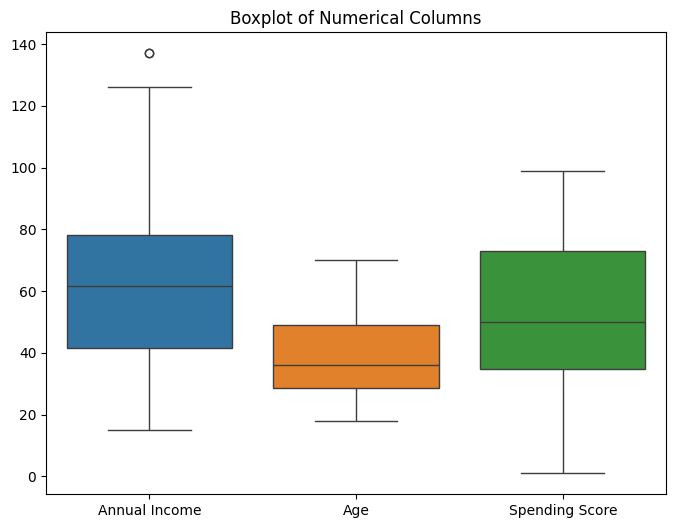

In [ ]:
# using boxplot
numerical_cols = ['Annual Income','Age','Spending Score']

plt.figure(figsize=(8,6))
sns.boxplot(data=df[numerical_cols])
plt.title('Boxplot of Numerical Columns')
plt.show()

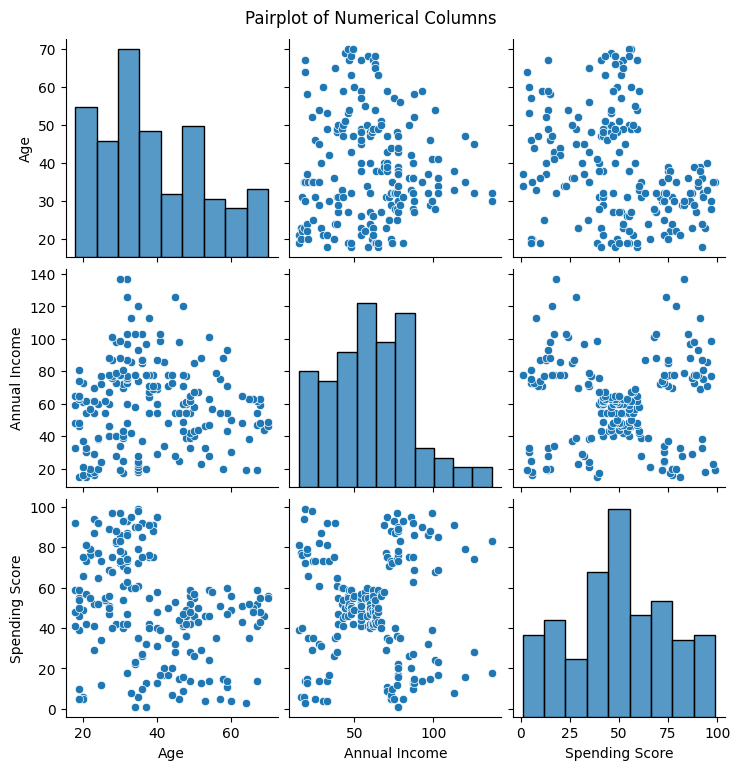

In [ ]:
sns.pairplot(df[['Age','Annual Income','Spending Score']])
plt.suptitle('Pairplot of Numerical Columns',y=1.02)
plt.show()

In [ ]:
df['Gender'] = df['Gender'].map({'Male':0,'Female':1})
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


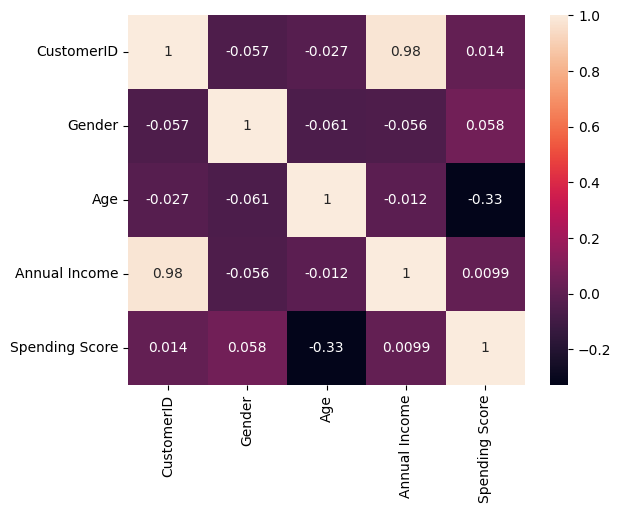

In [ ]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
#standard scaling

from sklearn.preprocessing import StandardScaler
numerical_cols = ['Annual Income','Age','Spending Score']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_cols])

# PCA TECHNIQUE

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(data=pca_data,columns=['PC1','PC2'])

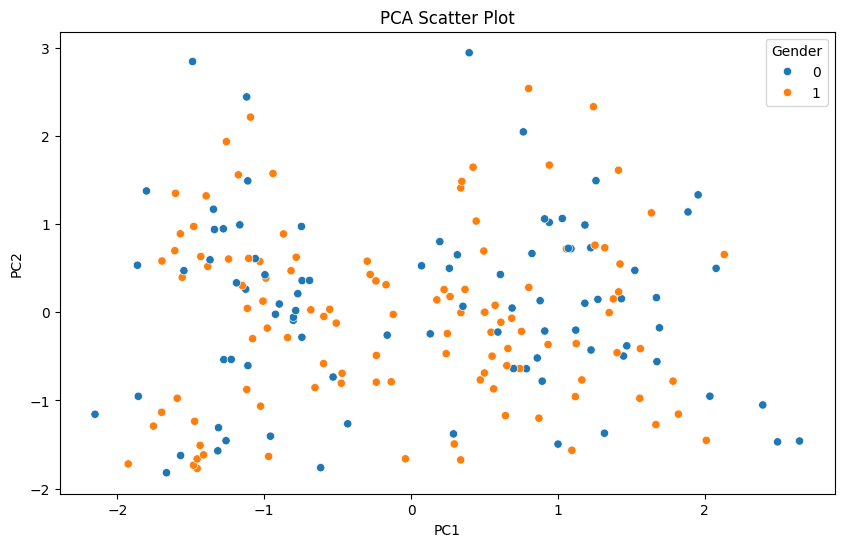

In [ ]:
#visualize PCA
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_pca,x='PC1',y='PC2',hue=df['Gender'])
plt.title('PCA Scatter Plot')
plt.show()

Text(0, 0.5, 'Inertia')

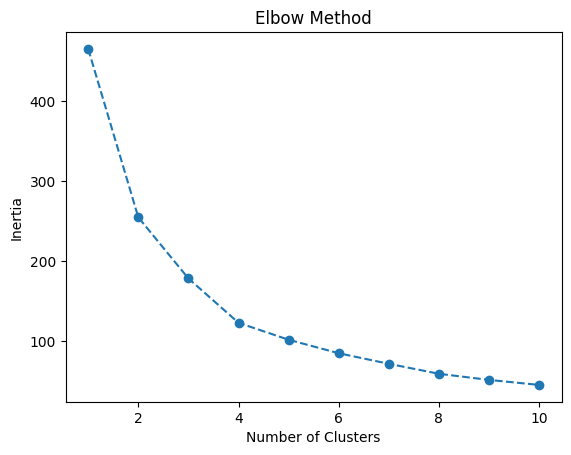

In [ ]:
#kmeans clustering
from sklearn.cluster import KMeans

inertia = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(df_pca)
  inertia.append(kmeans.inertia_)

#plot curve for elbow method

plt.plot(range(1,11),inertia,marker='o',linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')


In [ ]:
optimal_k =5
k_means = KMeans(n_clusters=optimal_k,random_state=42,n_init=10)
Clusters = k_means.fit_predict(df_scaled)
df['Clusters'] = Clusters
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score,Clusters
0,1,0,19,15,39,1
1,2,0,21,15,81,1
2,3,1,20,16,6,0
3,4,1,23,16,77,1
4,5,1,31,17,40,1


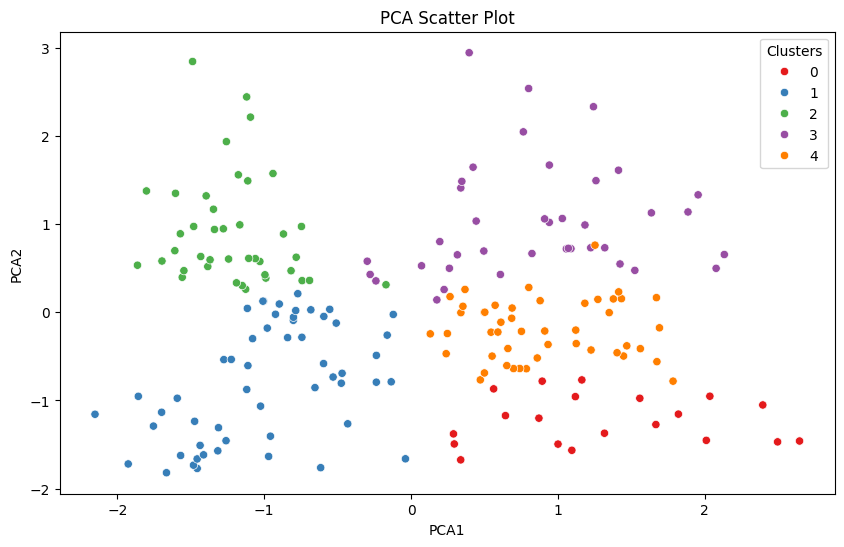

In [ ]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled)
df['PCA1'],df['PCA2'] = pca_data[:,0],pca_data[:,1]

plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='PCA1',y='PCA2',hue='Clusters',palette='Set1')
plt.title('PCA Scatter Plot')
plt.show()

In [ ]:
#siluhuotte score
from sklearn.metrics import silhouette_score
score = silhouette_score(df_scaled, Clusters)
print("Silhouette Score:", score)

Silhouette Score: 0.41664341513732767


In [ ]:
from sklearn.metrics import davies_bouldin_score
dbi = davies_bouldin_score(df_scaled, Clusters)
print("Davies-Bouldin Index:", dbi)

Davies-Bouldin Index: 0.874551051002418


In [ ]:
cluster_labels = {
     0: "Conservative Shopper",
     1: "Impulsive Shopper",
     2: "Young Loyalist",
     3: "Target customers",
     4: "Potential customers"
 }
df['segment'] = df['Clusters'].map(cluster_labels)

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score,Clusters,PCA1,PCA2,segment
0,1,0,19,15,39,1,-0.615720,-1.763481,Impulsive Shopper
1,2,0,21,15,81,1,-1.665793,-1.820747,Impulsive Shopper
2,3,1,20,16,6,0,0.337862,-1.674799,Conservative Shopper
3,4,1,23,16,77,1,-1.456573,-1.772430,Impulsive Shopper
4,5,1,31,17,40,1,-0.038465,-1.662740,Impulsive Shopper


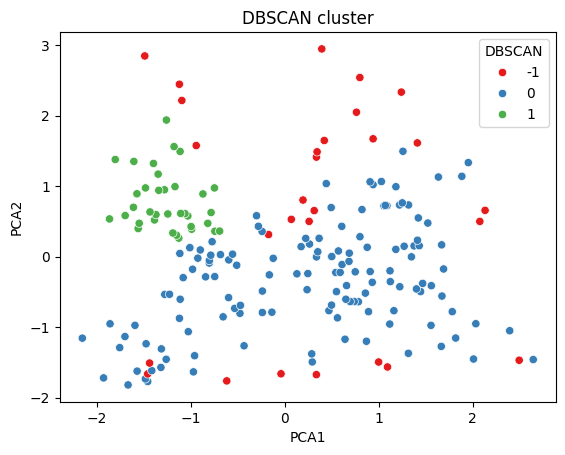

In [ ]:
#DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.6,min_samples=5)
db_clusters = dbscan.fit_predict(df_scaled)
df['DBSCAN'] = db_clusters
sns.scatterplot(x='PCA1', y='PCA2', hue='DBSCAN', data=df, palette='Set1')
plt.title("DBSCAN cluster")
plt.show()

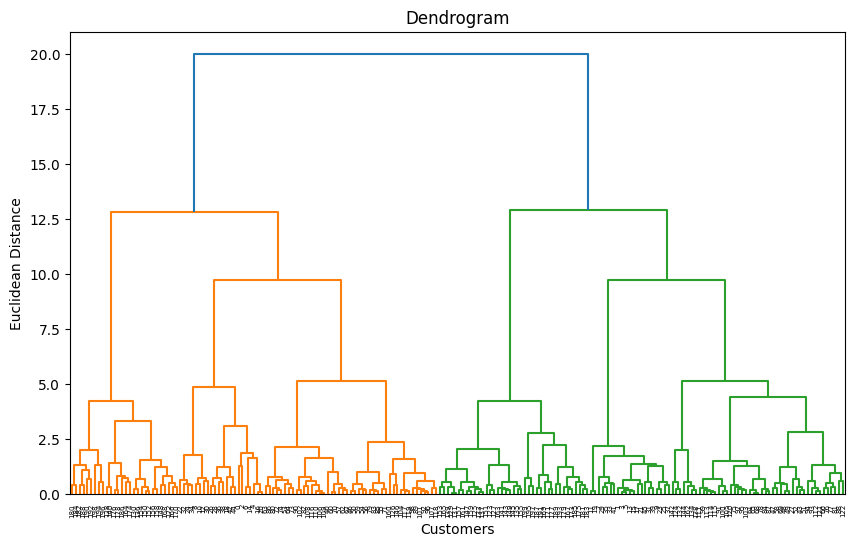

In [ ]:
#hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(10,6))
dendrogram(linkage(df_scaled,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

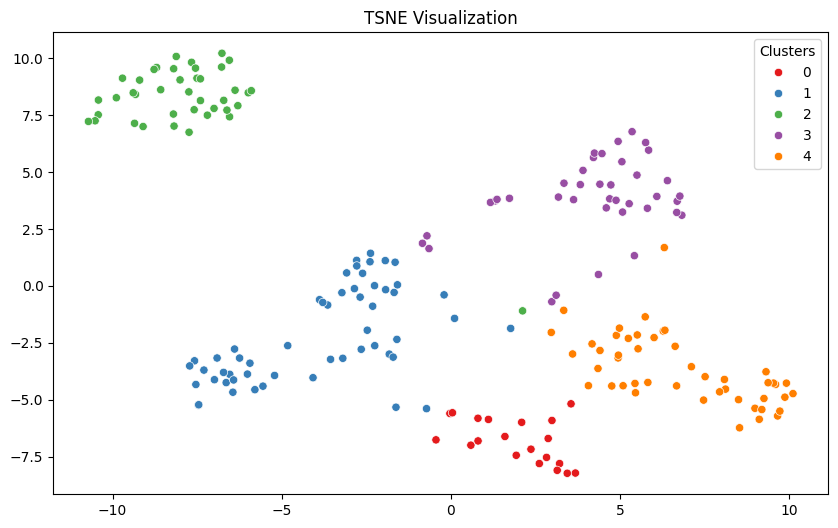

In [ ]:
#tsne Visualization
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,perplexity=30,n_iter=300)
tsne_data = tsne.fit_transform(df_scaled)

plt.figure(figsize=(10,6))
sns.scatterplot(x=tsne_data[:,0],y=tsne_data[:,1],hue=df['Clusters'],palette='Set1')
plt.title('TSNE Visualization')
plt.show()

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score,Clusters,PCA1,PCA2,segment,DBSCAN
0,1,0,19,15,39,1,-0.615720,-1.763481,Impulsive Shopper,-1
1,2,0,21,15,81,1,-1.665793,-1.820747,Impulsive Shopper,0
2,3,1,20,16,6,0,0.337862,-1.674799,Conservative Shopper,-1
3,4,1,23,16,77,1,-1.456573,-1.772430,Impulsive Shopper,0
4,5,1,31,17,40,1,-0.038465,-1.662740,Impulsive Shopper,-1
